In [89]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The income per capita per US State in 2018 is approximately a normal distribution with a mean of \$48,500 and a standard deviation of $8,500.

1) Create a PDF graph of this distribution with the proper labels on the axes.  

2) Say we wanted to create a rejection region for any states with below average
   income. If we set the rejection region at 40,000, what would the percentile
   value of that be given the distribution? 
   
3) Say that I'm a Senator from New York, which has an income per capita of \$64,500.  

   I believe that my state has an income that's conceivably different from the rest of the country - so different that I could convince someone that we're not even part of the United States. I want to use hypothesis testing to prove it.  
   
   Note that I am not surveying people - this is a single data point. In this case: 
   
       a) What is the null hypothesis?  
       
       b) What is the alternative hypothesis?  
       
       c) Say I want to do a two-tailed test at a significance level of 0.05 to see if
       my hypothesis is true. What is my rejection region? Can I reject the null hypothesis here?  
       
       d) Seeing that the average income per capita for New York is obviously higher than the
       income per capita for the United States, I want to change my test to a one-tailed test.
       
       At the 0.05 significance level, what is my rejection region? Can I reject the null hypothesis here? 
       
       e) Say I want to keep the test one-tailed, but change my significance level to 0.01. What is my rejection region now? Can I reject the null hypothesis here?  
       
4) Say now that I don't actually know the distribution of the income per capita per US State - I'm just making it up to sound smart. But I do survey ten state representatives from New York and get the following data points for income per capita of our state:
[62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821,
       63971]

        a) What is the sample mean for this distribution?
        b) What is the sample variance and sample standard deviation for this distribution?
        c) Say I again want to see if I can reject the null hypothesis that the income per capita for New York
        is the same as the income per capita for the United States.
           
           Note that this is based off of a survey of ten, so we would want to effectively see if the ten people we surveyed could have effectively been pulled from anywhere in the US, not just New York.
        d) Given a T-distribution with a mean of 50,000, our sample standard deviation, and nine degrees of freedom, what is the one-tailed rejection region at the 0.01 significance level? Can we reject the null hypothesis that New York has a different income per capita than the rest of the United States? Note that we are using our sample mean to determine this, not the previously stated value of $64,500. 
        
5) This information was actually pulled from the Wikipedia here - https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita.  
Using the pd.read_html function, read in the table of U.S. State by GDP capita and plot a histogram and boxplot of the 2018 data in the first table. Are there any outliers, and if so, which states are outliers?

BONUS 6) Remove the outlier (if there is one), and replot a histogram and boxplot of the data. Are there any outliers now?

Text(0.5, 0.92, 'The income per capita per US State in 2018')

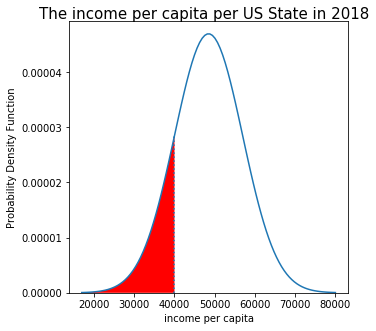

In [90]:
#Part 1
dist = stats.norm(48500, 8500)
fig = plt.figure(figsize=(5,5))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([40000, 40000],[0, dist.pdf(40000)], linestyle='dotted', color='#1f77b4')
plt.ylim(bottom=0)
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.15865525393145707))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('income per capita')
plt.ylabel('Probability Density Function')
fig.suptitle('The income per capita per US State in 2018', fontsize=15, y=0.92)

In [91]:
#Part 2
dist.cdf(40000)

0.15865525393145707

Part 3

a) What is the null hypothesis?  
    The income per capita of New York is equal to the mean of the country's income per capita.
    
   b) What is the alternative hypothesis?  
    The income per capita of New York is different than the mean of the country's income per capita.
    
   c) Say I want to do a two-tailed test at a significance level of 0.05 to see if
   my hypothesis is true. What is my rejection region? Can I reject the null hypothesis here?  
   The rejection region will be below 31840.306131409536 and above 65159.69386859046. The null hypothesis cannot be rejected.

   d) Seeing that the average income per capita for New York is obviously higher than the
   income per capita for the United States, I want to change my test to a one-tailed test.

   At the 0.05 significance level, what is my rejection region? Can I reject the null hypothesis here? 
   
   The rejection region will be above 62481.25582908752. The null hypothesis can be rejected.

   e) Say I want to keep the test one-tailed, but change my significance level to 0.01. What is my rejection region now? Can I reject the null hypothesis here?  
   
   The rejection region will be above 68273.95692934714. The null hypothesis cannot be rejected.

In [92]:
# Part C
print(dist.ppf(0.025))
print(dist.ppf(0.975))
#Part D 
print(dist.ppf(0.95))
# Part E
print(dist.ppf(0.99))

31840.306131409536
65159.69386859046
62481.25582908752
68273.95692934714


In [93]:
#Part 4
subset = [62837, 64511, 58821, 63971, 62837, 57084, 64579, 62837, 58821, 63971]
# Part A
sample_mean = np.mean(subset)
print("sample mean: ", sample_mean)
# Part B
sample_std = np.std(subset)
sample_var = sample_std*sample_std
print("sample std: ", sample_std)
print("sample varience: ", sample_var)
#Part C
dist1=stats.norm(64500,2592)
dist1.ppf(0.95)
print("The rejection region is above", dist1.ppf(0.95), ". Therefore, we cannot reject the null hypothesis." )
#Part D
dist3 = stats.t(loc=50000, scale=np.std(subset, ddof=1)/np.sqrt(10), df=9)
print("The rejection region is above", dist3.ppf(0.99), ". Therefore, we can reject the null hypothesis." )

sample mean:  62026.9
sample std:  2592.2895845179028
sample varience:  6719965.290000001
The rejection region is above 68763.46060105822 . Therefore, we cannot reject the null hypothesis.
The rejection region is above 52437.99471397861 . Therefore, we can reject the null hypothesis.


(array([22., 22.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 31881. ,  44740.1,  57599.2,  70458.3,  83317.4,  96176.5,
        109035.6, 121894.7, 134753.8, 147612.9, 160472. ]),
 <a list of 10 Patch objects>)

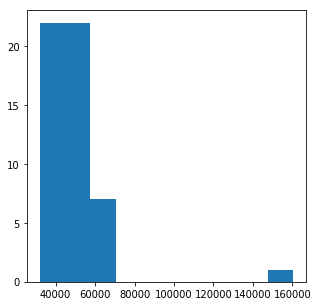

In [94]:
#Part 5
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita',header=0)[0]
df2=df[['State','2018']]
fig = plt.figure(figsize=(5,5))
plt.hist(df2['2018'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1e7739b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1e773c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1e773588>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1e77d710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1e77da58>],
 'means': []}

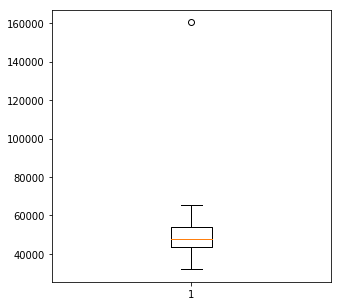

In [95]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df2['2018'])

In [96]:
Quantile1 = df2['2018'].quantile(0.25)
Quantile3 = df2['2018'].quantile(0.75)
InterQRange = Q3 - Q1
Max = (InterQRange*1.5) + Q3
Min = -(InterQRange*1.5) + Q1
d = df2[df2['2018']>=Max]
dd = df2[df2['2018']<= Min]
ans = d.append(dd)
print(ans, "is an outlier.")

                  State    2018
0  District of Columbia  160472 is an outlier.


In [97]:
#Part 6
df3 = df2[df2['State'] != 'District of Columbia']

(array([ 1.,  6.,  5., 11.,  5.,  7.,  7.,  2.,  1.,  6.]),
 array([31881. , 35247.4, 38613.8, 41980.2, 45346.6, 48713. , 52079.4,
        55445.8, 58812.2, 62178.6, 65545. ]),
 <a list of 10 Patch objects>)

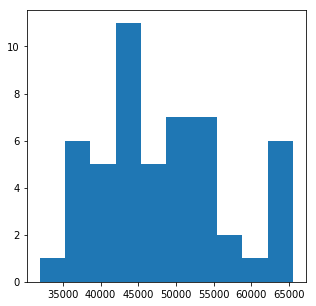

In [98]:
fig = plt.figure(figsize=(5,5))
plt.hist(df3['2018'])

There are no outliers now


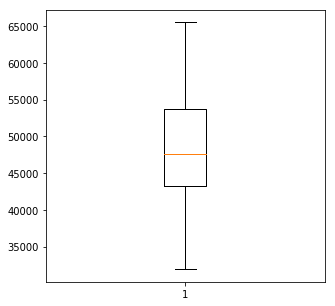

In [99]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df3['2018'])
print("There are no outliers now")